In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSteps

## Introduction ##

This project is a component of course 8 within the "Data Analytics Professional Certificate" program. Both the data and scenario were furnished as part of the course curriculum, and completing this capstone assignment is optional. To address the primary business objective, I will adhere to the six stages of data analysis outlined in the course: Ask, Prepare, Process, Analyze, Share, and Act. Python was used for the completion of this project.


**Scenario**

As a junior data analyst within the marketing analytics team at Bellabeat, I am tasked with contributing to the company's growth strategy by leveraging insights from smart device fitness data. The management team at Bellabeat sees potential in analyzing this data to uncover new opportunities for expansion. My specific assignment involves delving into the usage patterns of Bellabeat's products through smart device data. The ultimate goal of this analysis is to unearth valuable insights that will inform and shape the company's marketing strategy moving forward.


**Background**

[Bellabeat](<https://bellabeat.com/>) is a high-tech manufacturer of health-focused products for women. Bellabeat develops wearables and accompanying products that monitor biometric and lifestyle data to help women better understand how their bodies work and make healthier choices. Their products include: 
--Bellabeat app, 
--Leaf, wellness tracker
--Time wellness watch 
--Spring a water bottle that tracks daily water intake.

**Stakeholders**

--Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
--Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
--Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and
reporting data that helps guide Bellabeat’s marketing strategy. 

## **1.Ask** ## 

During this phase, my primary focus will be on asking questions to gain a comprehensive understanding of the business objective. The overarching goal is to select a specific Bellabeat product and leverage insights derived from it to formulate recommendations for the development of a marketing strategy aimed at generating demand.

## **2.Prepare**

In this phase I will load the relevant libraries I will need. I will load my data and use Pandas to read my CSV files. The data provided to analyse can be found in Kaggel under dataset name [FitBit Fitness Tracker Data](<https://www.kaggle.com/datasets/arashnic/fitbit/data>). I have reviewed the data and I decided that  for the purposes this project I will use data on sleep and activity.

In [2]:
#Import relevant libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load data files  
sleep_data = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
activity_data = pd.read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")


In [4]:
#Familiarise myself with the data 
sleep_data.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407


In [5]:
#Familiarise myself with the data 
activity_data.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797


In [6]:
#Familiarise myself with the data 
activity_data.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [7]:
#Familiarise myself with the data 
sleep_data.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [8]:
#Familiarise myself with the data
activity_data.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [9]:
#Familiarise myself with the data 
sleep_data.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


## **3.Process**

I will need to separate the SleepDay column to Date and Time, as Date is only relevant to my analysis, and continues to change date data types in order to merge my files at a later stage. 

In [10]:
#Convert SleepDay to to datetime format
sleep_data['SleepDay'] = pd.to_datetime(sleep_data['SleepDay'])


/tmp/ipykernel_18/3877241462.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_data['SleepDay'] = pd.to_datetime(sleep_data['SleepDay'])


In [11]:
# Extract date and time components into separate columns
sleep_data['Date'] = sleep_data['SleepDay'].dt.date
sleep_data['time'] = sleep_data['SleepDay'].dt.time

Using the head function , I am checking that the data has been separated.

In [12]:
#Confirm my data is spit to date and time
sleep_data.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,time
0,1503960366,2016-04-12,1,327,346,2016-04-12,00:00:00
1,1503960366,2016-04-13,2,384,407,2016-04-13,00:00:00
2,1503960366,2016-04-15,1,412,442,2016-04-15,00:00:00
3,1503960366,2016-04-16,2,340,367,2016-04-16,00:00:00
4,1503960366,2016-04-17,1,700,712,2016-04-17,00:00:00


Checking my data types earlier, I could see that my date in both df is not in date format which will cause issues when I will need to merge the two df. So I proceed to change date in both files to date format

In [13]:
# Convert date data types datetime format 
if sleep_data['Date'].dtype != 'datetime64[ns]':
    sleep_data['Date'] = pd.to_datetime(sleep_data['Date'])
if activity_data['ActivityDate'].dtype != 'datetime64[ns]':
    activity_data['ActivityDate'] = pd.to_datetime(activity_data['ActivityDate'])

In [14]:
# Select the just the columns that are relevant to my analysis and create df "sleep" for ease of use
sleep = sleep_data[["Id", "TotalMinutesAsleep", "TotalTimeInBed", "Date"]]
sleep.head()

,Id,TotalMinutesAsleep,TotalTimeInBed,Date
0,1503960366,327,346,2016-04-12
1,1503960366,384,407,2016-04-13
2,1503960366,412,442,2016-04-15
3,1503960366,340,367,2016-04-16
4,1503960366,700,712,2016-04-17


In [15]:
#Check my data types 
sleep.dtypes

Id                             int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
Date                  datetime64[ns]
dtype: object

In [16]:
# Select the relevant to my analysis columns
activity = activity_data[["Id", "ActivityDate", "TotalSteps", "TotalDistance", "VeryActiveDistance", "VeryActiveMinutes", "SedentaryMinutes", "Calories"]]
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,1.88,25,728,1985
1,1503960366,2016-04-13,10735,6.97,1.57,21,776,1797
2,1503960366,2016-04-14,10460,6.74,2.44,30,1218,1776
3,1503960366,2016-04-15,9762,6.28,2.14,29,726,1745
4,1503960366,2016-04-16,12669,8.16,2.71,36,773,1863


In [17]:
#Check my data types 
activity.dtypes

Id                             int64
ActivityDate          datetime64[ns]
TotalSteps                     int64
TotalDistance                float64
VeryActiveDistance           float64
VeryActiveMinutes              int64
SedentaryMinutes               int64
Calories                       int64
dtype: object

In [18]:
# Merge the two tables on "Id" and "Date" using full join
merged_data = pd.merge(sleep, activity, left_on=['Id', 'Date'], right_on=['Id', 'ActivityDate'], how='outer')
merged_data.head(30)

,Id,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes,Calories
0,1503960366,327.0,346.0,2016-04-12,2016-04-12,13162,8.50,1.88,25,728,1985
1,1503960366,384.0,407.0,2016-04-13,2016-04-13,10735,6.97,1.57,21,776,1797
2,1503960366,NaN,NaN,NaT,2016-04-14,10460,6.74,2.44,30,1218,1776
3,1503960366,412.0,442.0,2016-04-15,2016-04-15,9762,6.28,2.14,29,726,1745
4,1503960366,340.0,367.0,2016-04-16,2016-04-16,12669,8.16,2.71,36,773,1863
5,1503960366,700.0,712.0,2016-04-17,2016-04-17,9705,6.48,3.19,38,539,1728
6,1503960366,NaN,NaN,NaT,2016-04-18,13019,8.59,3.25,42,1149,1921
7,1503960366,304.0,320.0,2016-04-19,2016-04-19,15506,9.88,3.53,50,775,2035
8,1503960366,360.0,377.0,2016-04-20,2016-04-20,10544,6.68,1.96,28,818,1786
9,1503960366,325.0,364.0,2016-04-21,2016-04-21,9819,6.34,1.34,19,838,1775


In [19]:
#Check my data types 
merged_data.dtypes

Id                             int64
TotalMinutesAsleep           float64
TotalTimeInBed               float64
Date                  datetime64[ns]
ActivityDate          datetime64[ns]
TotalSteps                     int64
TotalDistance                float64
VeryActiveDistance           float64
VeryActiveMinutes              int64
SedentaryMinutes               int64
Calories                       int64
dtype: object

## **3.Analyse**
Now I have prepared my data I will proceed to analysis. 

I will merge the two dataframes and use "head" function to check if successful.

When used the "descride" function earlier I could see some extremely low and hihg values. I will create boxplots to review those outliers and exclude if need.

In [20]:
# Merge the two tables on "Id" and "Date" using full join
merged_data = pd.merge(sleep, activity, left_on=['Id', 'Date'], right_on=['Id', 'ActivityDate'], how='outer')
merged_data.head()

,Id,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes,Calories
0,1503960366,327.0,346.0,2016-04-12,2016-04-12,13162,8.50,1.88,25,728,1985
1,1503960366,384.0,407.0,2016-04-13,2016-04-13,10735,6.97,1.57,21,776,1797
2,1503960366,NaN,NaN,NaT,2016-04-14,10460,6.74,2.44,30,1218,1776
3,1503960366,412.0,442.0,2016-04-15,2016-04-15,9762,6.28,2.14,29,726,1745
4,1503960366,340.0,367.0,2016-04-16,2016-04-16,12669,8.16,2.71,36,773,1863


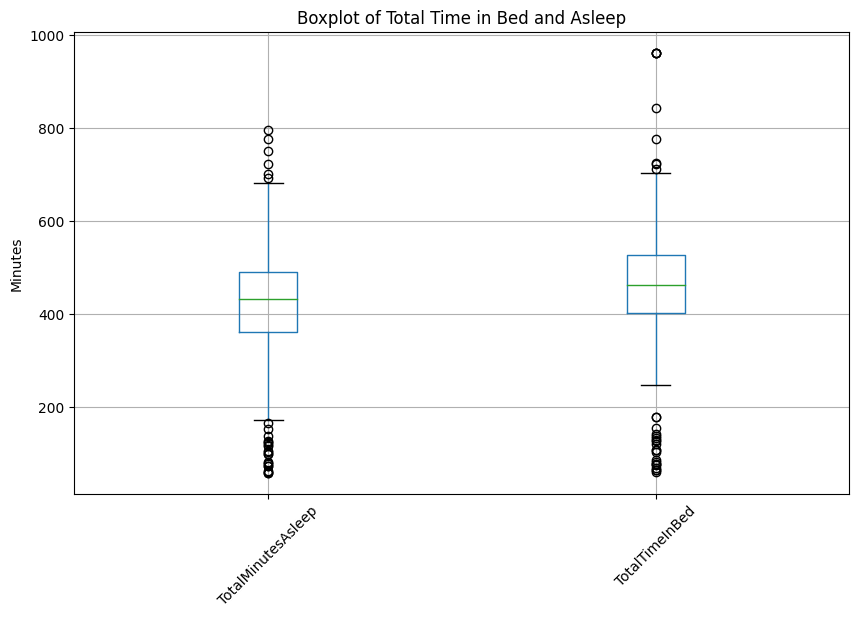

In [21]:
#Create a boxplto to check outliers
plt.figure(figsize=(10, 6))
merged_data.boxplot(column=['TotalMinutesAsleep', 'TotalTimeInBed'])
plt.title('Boxplot of Total Time in Bed and Asleep')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.show()

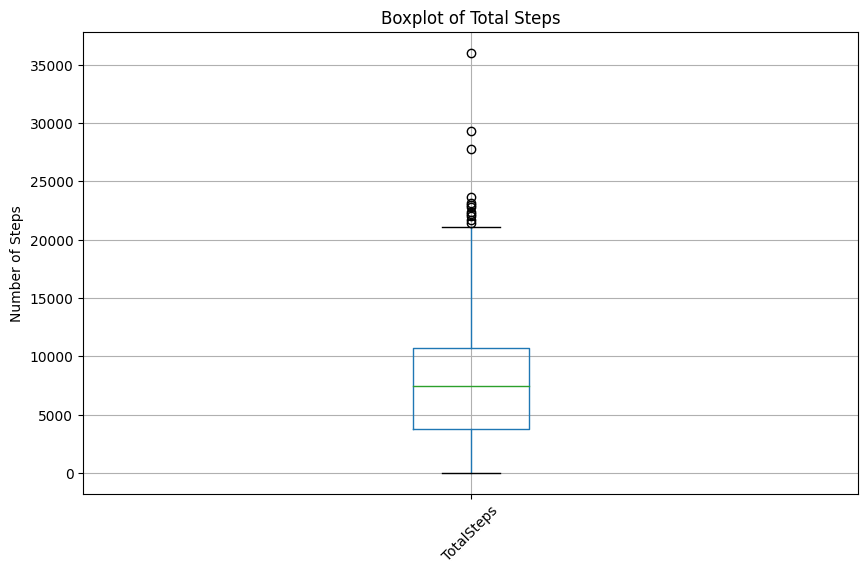

In [22]:
#Create a boxplto to check outliers
plt.figure(figsize=(10, 6))
merged_data.boxplot(column=['TotalSteps'])
plt.title('Boxplot of Total Steps')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.show()

In [23]:
#I will exclude values over 21,000 steps as those are my outliers
mask = merged_data['TotalSteps'] < 21000
merged_data[mask]

,Id,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes,Calories
0,1503960366,327.0,346.0,2016-04-12,2016-04-12,13162,8.50,1.88,25,728,1985
1,1503960366,384.0,407.0,2016-04-13,2016-04-13,10735,6.97,1.57,21,776,1797
2,1503960366,NaN,NaN,NaT,2016-04-14,10460,6.74,2.44,30,1218,1776
3,1503960366,412.0,442.0,2016-04-15,2016-04-15,9762,6.28,2.14,29,726,1745
4,1503960366,340.0,367.0,2016-04-16,2016-04-16,12669,8.16,2.71,36,773,1863
...,...,...,...,...,...,...,...,...,...,...,...
937,8877689391,NaN,NaN,NaT,2016-05-07,12332,8.13,0.08,105,1036,4142
938,8877689391,NaN,NaN,NaT,2016-05-08,10686,8.11,1.08,17,1174,2847
939,8877689391,NaN,NaN,NaT,2016-05-09,20226,18.25,11.10,73,1131,3710
940,8877689391,NaN,NaN,NaT,2016-05-10,10733,8.15,1.35,18,1187,2832


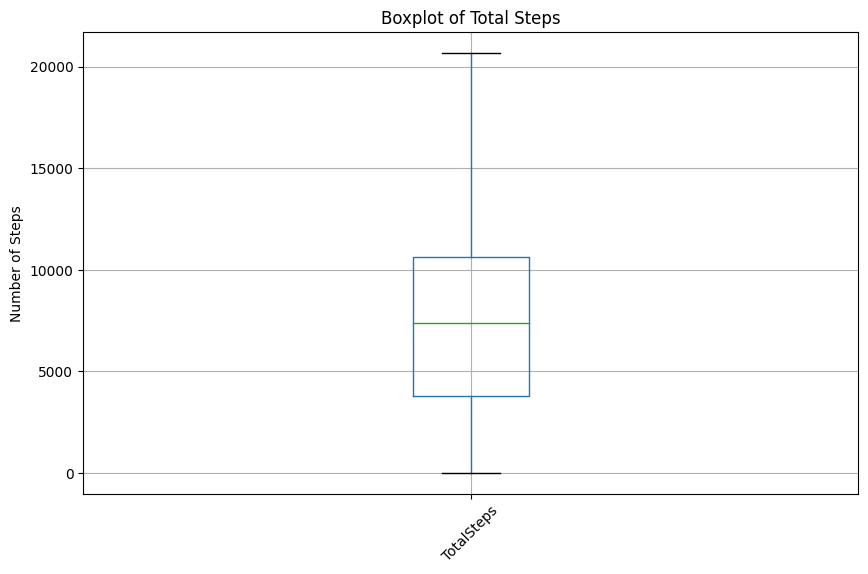

In [24]:
#I will check my mask to confirm outliers are excluded before I proceed 
plt.figure(figsize=(10, 6))
merged_data[mask].boxplot(column=['TotalSteps'])
plt.title('Boxplot of Total Steps')
plt.ylabel('Number of Steps')
plt.xticks(rotation=45)
plt.show()

In [25]:
#I will create a mask to exclude outliers for sleep time
mask = (merged_data['TotalMinutesAsleep'] > 180) & (merged_data['TotalMinutesAsleep']<800)
merged_data[mask]

,Id,TotalMinutesAsleep,TotalTimeInBed,Date,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,VeryActiveMinutes,SedentaryMinutes,Calories
0,1503960366,327.0,346.0,2016-04-12,2016-04-12,13162,8.50,1.88,25,728,1985
1,1503960366,384.0,407.0,2016-04-13,2016-04-13,10735,6.97,1.57,21,776,1797
3,1503960366,412.0,442.0,2016-04-15,2016-04-15,9762,6.28,2.14,29,726,1745
4,1503960366,340.0,367.0,2016-04-16,2016-04-16,12669,8.16,2.71,36,773,1863
5,1503960366,700.0,712.0,2016-04-17,2016-04-17,9705,6.48,3.19,38,539,1728
...,...,...,...,...,...,...,...,...,...,...,...
901,8792009665,343.0,360.0,2016-04-30,2016-04-30,7174,4.59,0.33,10,749,2896
902,8792009665,503.0,527.0,2016-05-01,2016-05-01,1619,1.04,0.00,0,834,1962
903,8792009665,415.0,423.0,2016-05-02,2016-05-02,1831,1.17,0.00,0,916,2015
904,8792009665,516.0,545.0,2016-05-03,2016-05-03,2421,1.55,0.00,0,739,2297


Now I have excluded outliers, I will create some scatter plots to check the correlation between sleep and activity. 

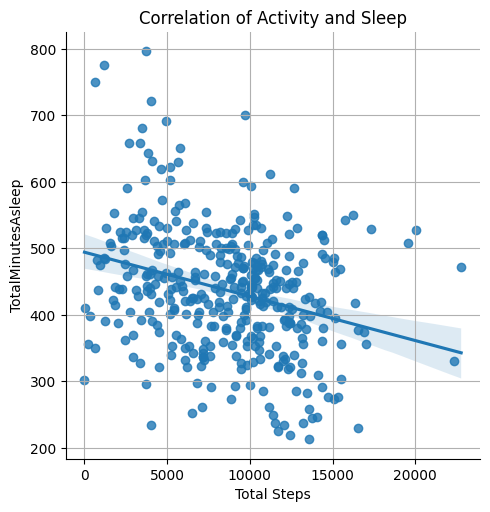

In [26]:
sns.lmplot(x='TotalSteps', y='TotalMinutesAsleep', data=merged_data[mask])
plt.xlabel('Total Steps')
plt.ylabel('TotalMinutesAsleep')
plt.title('Correlation of Activity and Sleep')
plt.grid(True)

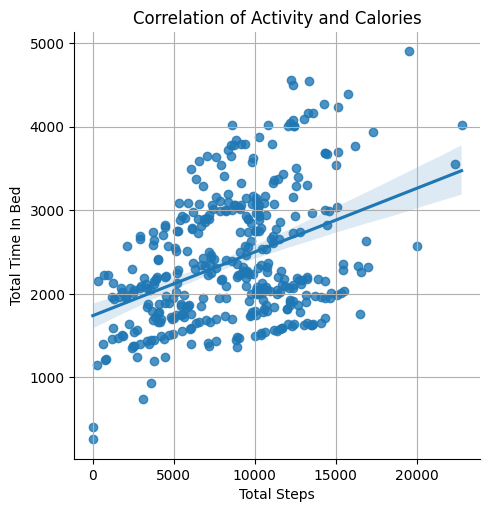

In [27]:
sns.lmplot(x='TotalSteps', y='Calories', data=merged_data[mask])
plt.xlabel('Total Steps')
plt.ylabel('Total Time In Bed')
plt.title('Correlation of Activity and Calories')
plt.grid(True)


## **5.Share**

In this phase I will create a presentation to present to the team. Based on the above finding, on the scatterplot "Correlation of Activity and Sleep", there is a negative correltion of the two. Based on the scatterplot "Correlation of Activity and Calories", there is a positve correltion of the two.

## **6.Act**


In this concluding phase, I will propose strategies for developing a marketing plan focused on stimulating product demand specifialy for the product "Time", a luxury hybrid wellness watch. 

Our analysis findings indicate a negative correlation between sleep time and activity levels. As a result, I would recommend launching a marketing campaign that emphasizes the significance of monitoring one's sleep for individuals striving to maintain high levels of activity throughout the day. 

Additionally, our analysis reveals a positive correlation between physical activity and calorie consumption which refers to the amount of calories that an individual consumes through their diet. Therefore, monitoring or regulating calorie consumption can be important for individuals who are concerned about maintaining a healthy lifestyle or managing their weight.

Therefore, targeting consumers interested in monitoring or managing their calorie intake presents an opportunity for effective marketing strategies. By highlighting these correlations and promoting the benefits of our product in facilitating sleep monitoring and calorie regulation, we aim to attract and engage our target audience effectively.